## Basic Clustering using ad-hoc techniques : The example of product management

1 - As a supply and logistics manager I
want to organize your supply chain more efficiently.

- Decide to mantain huge stocks → ensure product availability but brings a high cost.
- Decide to wait up to the last minute, before deciding on the production → Cheaper but ability to deliver the product on time may be negatively impacted.

So:
- Analyze the question along 2D:

Plot average daily sales of the Stock Keeping Unit (SKU), as a function of the volatility of daily sales of this SKU.
The volatility of something, can be measured with a coefficient variation.

In [91]:
import pandas as pd
import numpy as np

# Read the data
df = pd.read_csv(
    "../DATA/SKU.csv"
)

df = pd.DataFrame(df)

print(
    f"Dataset:\n{df.head(5)}\n"
)

print(
    f"Shape:\n{df.shape}"
)

print(
    f"\nMissing Values:\n{df.isnull().sum()}"
)

Dataset:
   ADS    CV
0    1  0.68
1    3  0.40
2    1  0.59
3    2  0.39
4    9  0.11

Shape:
(100, 2)

Missing Values:
2


In this case, the Coeff Variation is:
* the StandDev of sales / mean sales.
Which means, the variation of sales in relationship to the mean of the sales.
* Lower values close to 0 will indicate that the volatility is low, therefore, the product's sales behave in a predictable manner.
* Higher values close to 1 will indicate that the product's sales vary singificanly and their predictability seems more complicated.

In [132]:
def show_SKU(df, x, y, vline, hline):
    from matplotlib import pyplot as plt

    fig = plt.figure(figsize=(10,4))

    # Plot density
    df.plot.scatter(title='SKU vs Coefficient Variation', x=x, y=y) 

    # Split in groups
    plt.axhline(y=hline, color = 'gray', linestyle='dashed', linewidth = 2)
    plt.axvline(x=vline, color = 'gray', linestyle='dashed', linewidth = 2)

    plt.xlabel("Volatility of sales")
    plt.ylabel("Volume of sales")

    plt.text(0.8, 1, "Crickets")
    plt.text(0.85,8, "Bulls")
    plt.text(0.1,7.5,  "Horses")
    # Show the figure
    plt.show()

<Figure size 1000x400 with 0 Axes>

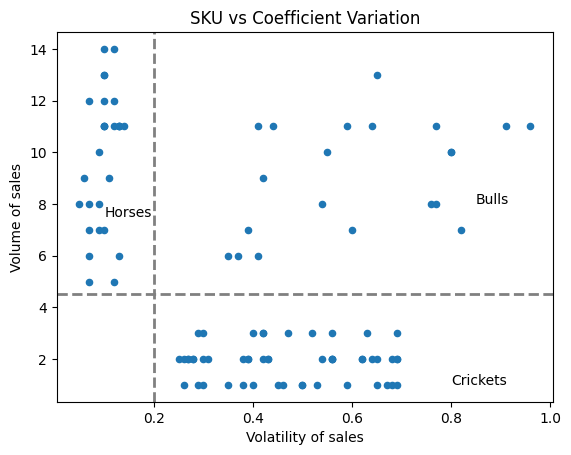

In [133]:
show_SKU(df, x = "CV", y = "ADS", vline = 0.2, hline = 4.5)

We can then identify groups of SKU that are similar to each other visually. Let's propose an easy-name to remember for the stakeholders.

- Horse: High Sales and Low variablilty. Strong and reliable.
- Wild Bulls: High Sales and High Variablity. Strongs but difficult to control.
- Crickets: Small, but can jump unexpectecly.

3 Groups that require 3 different approaches.
- Horses -> Make to Stock : They'll be made quickly available for sales by forecasting the demands, and preparing the production in advance. It may seem expensive to keep everything in stock, but the benefits cover largely the costs. Because sales are expected to be high, and the risk of inaccurate forecast is low, since the coefficient of variation is small.
- Crickets -> Made to order. Wait to have an order before starting the production process.Since the sales are small, in any case, it's not really efficient to prepare production too long in advance. So we reduce risk, by producing the stock only if the order is made.
- Bulls: Treated as case to case. There are fewer. Things may difficult to anticipate, but their return may be high. So let's be pragmatic and access the situation in each case specifically.

# What if we have +2D ? - Employees leaving the company may be affected by different factors.

### Hierarchical Clustering ( hclust in R )

* Bring +2D data into 2D with a Principal Component Analysis or by identifying the 2 strongest factors in order to plot in 2D.
* Find a clustering approach that maps each row of your data into a group or cluster.
* Plot the 2D data and colour it by the new column "group", added with the previous clustering.

We want to minimize the similarity within clusters and maximize the dissimilarity between cluster. Hence, employees that behave similar within them will be grouped, and employees that behave assimilar between other groups will be located in different groups.

Text(0.5, 1.0, 'Normalized SKU analysis')

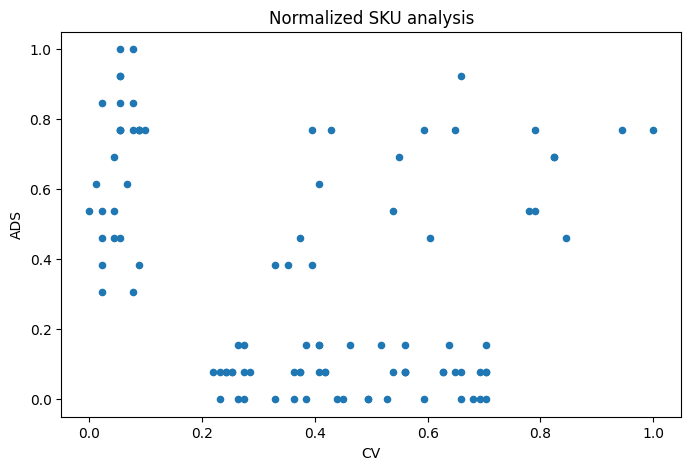

In [125]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
# Get a scaler object
scaler = MinMaxScaler()

# Create a new dataframe for the scaled values
df_normalized = df[['ADS', 'CV']].copy()

# Normalize the numeric columns
df_normalized[['ADS', 'CV']] = scaler.fit_transform(df_normalized[['ADS', 'CV']])

# Plot the normalized values
df_normalized.plot.scatter(x='CV', y="ADS", figsize=(8,5))
plt.title("Normalized SKU analysis")

### Hierarchical clustering

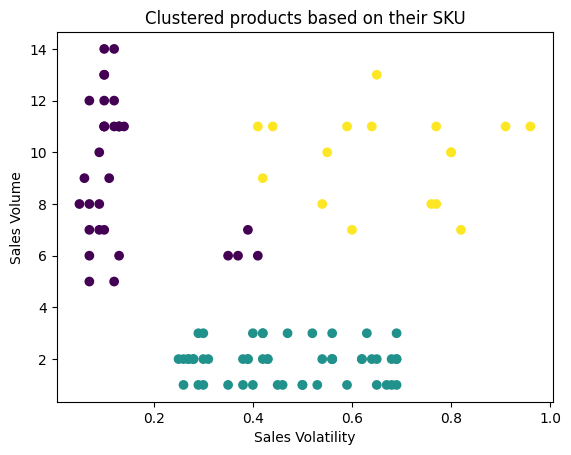

In [170]:
from sklearn.cluster import AgglomerativeClustering

df_clustered = AgglomerativeClustering(n_clusters=3).fit(df_normalized)
groups = ["hourse, cricket, bull"]
plt.scatter(df["CV"], df["ADS"], c=df_clustered.labels_)
plt.title("Clustered products based on their SKU")
plt.xlabel("Sales Volatility")
plt.ylabel("Sales Volume")
plt.show()

We can identify again the 3 previously mentioned groups.